### Übung 3: Rekursion & Erste Datentypen

Erarbeitet von | Kilian Lorenz|Jacob Ruhnau
---:|---:|---:
Matrikel-Nr.|8485476|2441453
Studiengang|WDS22|WWI22a
Mail|lorenzk@dhbw-loerrach.de|ruhnauja@dhbw-loerrach.de

# Im Falle einer Präsentation dieser Lösungen in der Vorlesung diese Zelle bitte einklappen

In [5]:
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt

#### 1 Optimierte Rekursion

a) Erstelle eine optimierte Version der Fibonacci Rekursion, die wir in der "in-class-Übung 3" gesehen haben (s.U.).  
Dabei soll es sich noch immer um eine rekursive Implementierung handeln, jedoch eine die schneller läuft.  
**[4 points]**

In [6]:
# fib() // recursive fibonacci function from in-class-exercise 3
def fib(n=0):    
    if n == 0:
        return 0
    if n == 1: 
        return 1
    else:
        return fib(n-1) + fib(n-2) 

In [7]:
# fib_improved_with_dict // Implementation of an improved version of fib()-algorithm

def fib_improved_with_dict(n=0, fib_dict=None):
    if fib_dict is None:
        fib_dict = {}
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        if (n not in fib_dict.keys()):
            fib_dict[n] = fib_improved_with_dict(n-1, fib_dict) + fib_improved_with_dict(n-2,fib_dict)
        return fib_dict[n]

b) Messen Sie die Laufzeiten für beide Funktionen für mindestens eine Inputgröße, um zu zeigen, dass Ihre Implementierung schneller ist.  
Warum ist Ihre Lösung schneller, welche Probleme hat die originale Funktion?  
**[4 points]**

#### _Zu 1b)_ Bewertung der Laufzeiten von `fib()` und `fib_improved_with_dict()`

Beide Algorithmen implementieren die Berechnung der Fibonacci-Zahlen auf rekursive Weise. 
Der erste Algorithmus `fib()` weist jedoch eine exponentielle Komplexität auf, da er für jede Zahl $n > 1$ die Funktion mehrmals aufruft, wobei die Resultate zuerst im Stack abgelegt werden um diese nach Erreichunng des Basecases wieder abzurufen. Dies führt zu einem exponentiellen  Anstieg der Funktionsaufrufe und einer potenziell schlechteren Laufzeit bei großen Eingabewerten.
Der zweite Algorithmus `fib_improved_with_dict()` nutzt ein builtin dict, um berechnete Zahlen in einem dort zu speichern. Dieses wird im rekursiven Aufruf wiederum als Parameter mitgegeben, wodurch bereits errechnete Werte dann zur Verfügung stehem. Auf diese Weise wird die Laufzeit erheblich verbessert. 

Anmerkung: Bei der Betrachtung der Space Complexity könnte die Funktion `fib_improved_with_dict()` allerdnigs grössere Nachteile ausweisen, da dann bei sehr großen Eingabewerten Speicherbeschränkungen des Computers limitieren könnte.

In [8]:
# timeit_fib() // Implementation of method to measure runtimes of fibunacci algorithms for different inputs with timeit-module

def timeit_fib(algo, input_list: list[int]=None, print_after_input=False, round_precision:int =4, timeit_number:int = 1, algo_name:str=None):

    try:
        if(algo_name):
            times = pd.DataFrame(columns=["01 input", algo_name, "02 runs"])
        else:
            times = pd.DataFrame(columns=["01 input", algo.__name__, "02 runs"])
    except AttributeError:
        raise ValueError("Algo name cant get extracted, please provide name of algortihm as parameter for 'algo_name'")


    for input in input_list:
        time = timeit.timeit(lambda: algo(input), number=timeit_number)
        times.loc[len(times)] = [input, round(time, round_precision), timeit_number]
    

    return(times)

In [9]:
# Geneating measurments for fibunacci-algorithms with timeit module.

inputs = [10,20,30]
timeit_number = 100
round_precision = 7

measurments_12 = timeit_fib(fib, inputs, timeit_number=timeit_number, round_precision=timeit_number)
measurments_12 = measurments_12.merge(timeit_fib(fib_improved_with_dict, inputs, round_precision=timeit_number, timeit_number=timeit_number))
#measurments = measurments.merge(timeit_fib(fib_improved_but_no_recursion, inputs, round_precision=7, timeit_number=1000))
measurments_12 = measurments_12.sort_index(axis=1)
display(measurments_12)

,01 input,02 runs,fib,fib_improved_with_dict
0,10.0,100.0,0.001089,0.000237
1,20.0,100.0,0.132992,0.000493
2,30.0,100.0,16.400941,0.000755


#### Aufgabe 2: Linked Lists
a) Erstellen Sie eine "Linked_List" Klasse, die die Funktionsweise des Datentyps Linked List abbildet.   
Die Klasse sollte die Methoden *prepend* und *append* enthalten, die jeweils ein Element vorne bzw. hinten einfügen.  
**[5 points]**  

**Erinnerung:**  
Eine Linked List hat einen "head", das auf den "Anfang", also das erste Element zeigt.  
Weiterhin hat es "Nodes", die jeweil ein Element beinhalten, sowie einen Verweis auf das nächste Element.  

In [10]:
# Node / LinkedList // Implementation of a linked list.

# A node represents a single element of a linked list, existing of both the value and pointer to the next node.
class Node:
    def __init__(self, value):
        self.value = value
        self.pointer = None
        self.associated_list = None


# Custom LinkedList class which existst of 1 or more Nodes representing the values in a list and a header.
# New LinkedList-object can be initialized with or without Nodes, handed either as a single node or python-list of nodes.
# New Nodes can be appended() or prepended().
# Planned for implementation: insert(), pop()
class LinkedList:
    def __init__(self, values=None):
        self.head = None
        self.values = [] if values is None else values
        self.size = 0
        if values:
            self.__init_value_set()

    # This method is called by print(linkedList) and returns a string in following structure:
    # 'value1 -> value2 -> valueN -> None', where 'None' represents the end of the linked list.
    def __str__(self):
        # When the head is not defined, ergo list is empty, following gets returned
        if not self.head:
            return "LinkedList is empty"
        # While iritiating over each node in list we build up a print_string.
        else:
            print_str = ""
            node = self.head
            while node:
                print_str += str(node.value) + " -> "
                node = node.pointer
            print_str += "None"
            return print_str

    # Method which gets called by constructor if values are already given at point of object initialization.
    def __init_value_set(self):
        self.head = self.values[0] if isinstance(self.values[0], Node) else Node(self.values[0])
        self.values[0] = self.head
        for i in range(1, len(self.values)):
            next_node = self.values[i] if isinstance(self.values[i], Node) else Node(self.values[i])
            self.values[i] = next_node
            self.values[i-1].pointer = next_node
            # Todo: associated_list if allready has a value -> make list
            self.values[i].associated_list = self    
        self.__set_size()

    # Method to call when value-size is changed.
    def __set_size(self):
        self.size = len(self.values)

    # Method to call to prepend either single or list (builtin) of nodes or values which calls "__prepend_single_node()" for given node
    # or by iterating over the list of nodes and calling "__prepend_single_node()" for each.
    def prepend(self, nodes):
        if not isinstance(nodes, list):
            self.__prepend_single_node(nodes)
        else:
            for node in nodes:
                self.__prepend_single_node(node)

    # Here the actual prepending takes place.
    def __prepend_single_node(self, node):
        if not isinstance(node, Node):
            node = Node(node)
        node.pointer = self.head
        self.head = node
        self.__set_size()

    # Method to call to append either single or list (builtin) of nodes or values which calls "__append_single_node()" for given node
    # or by iterating over the list of nodes and calling "__append_single_node()" for each.
    def append(self, nodes):
        if not isinstance(nodes, list):
            self.__append_single_node(nodes)
        else:
            for node in nodes:
                self.__append_single_node(node)

    # Here the actual appending takes place.
    def __append_single_node(self, node):
        if not isinstance(node, Node):
            node = Node(node)
        if not self.head:
            self.head = node
            node.pointer = None
        else:
            end = self.head
            while end.pointer:
                end = end.pointer
            end.pointer = node
            node.pointer = None
        self.__set_size()

    def insert(self):
        pass

    def pop(self):
        pass


In [11]:
# Testing and playing with LinkedList 

jacob_Node = Node(value="Jacob")
my_first_linkedList = LinkedList()

my_first_linkedList.append(jacob_Node)
my_first_linkedList.append([Node("and"), "awesome"])
my_first_linkedList.append([Node("Kilian"), Node("have fun with"), Node("python")])
print(my_first_linkedList)
my_first_linkedList.prepend(Node("statement:"))
my_first_linkedList.prepend([Node("true"), Node("Super")])
my_first_linkedList.append(Node("!"))
print(my_first_linkedList)

Jacob -> and -> awesome -> Kilian -> have fun with -> python -> None
Super -> true -> statement: -> Jacob -> and -> awesome -> Kilian -> have fun with -> python -> ! -> None


b) Starten Sie mit einer leeren python-Liste, sowie mit einer leeren Linked List (deren Klasse sie in a erstellt haben).  
Fügen Sie nun jeweils die Zahlen 1.... n an erster Stelle ein. 
Beispiel für die Liste:
```python
l =[]
l.insert(0, 1)
l.insert(0, 2)
...
```
Messen Sie die Laufzeiten mit dem timeit Modul, um jeweils die Zahlen 1 ... 10000 hinzuzufügen

**Tipp:**  
Definieren Sie sich eine eigene Funktion zum hinzufügen der Elemente. Für die python List könnte dies z.B. so aussehen:  
```python
def insert_numbers_list(n, my_list):
        for _ in range(n):
            my_list.insert(0, _)
```  
Analog für die Linked List.  
Passen Sie ggf. den *number-Parameter* der timeit-Methode nach unten an, um nicht in zu lange Laufzeiten zu laufen.


In [12]:
# insert_numbers_builtin_list() / insert_numbers_LinkedList() // Implementation of methods to insert n-values into a list.
# Both methods take a list and n as a parameter while the ammount of n-values will be inserted (prepended) in to the respective list.

def insert_numbers_builtin_list(n:int=10000, list:list=[]):
    for _ in range(n):
        list.insert(0, _)

def insert_numbers_LinkedList(list:LinkedList=LinkedList(), n:int=10000):
    for _ in range(n):
        list.prepend(_)

In [13]:
# timeit_list_prepending() // Implementation of method to measure insertion-runtimes for different list-types and -inputs with timeit-module

def timeit_list_prepending(algo, input_list: list[int]=None, print_after_input=False, round_precision:int =4, timeit_number:int = 1, algo_name:str=None):

    try:
        if(algo_name):
            times = pd.DataFrame(columns=["01 input", algo_name, "02 runs"])
        else:
            times = pd.DataFrame(columns=["01 input", algo.__name__, "02 runs"])
    except AttributeError:
        raise ValueError("Algo name cant get extracted, please provide name of algortihm as parameter for 'algo_name'")

    for i in input_list:
        time = timeit.timeit(lambda: algo(n=i), number=timeit_number)
        times.loc[len(times)] = [i, round(time, round_precision), timeit_number]

    return(times)

c) Nehmen Sie weitere Laufzeit Datenpunkte auf, d.h. Messen Sie die Laufzeit für beide Listen-Typen für unterschiedliche input-Größen n.  
Plotten Sie jeweils die Laufzeit gegen die Input-Größe.  
**[5 points]**

In [14]:
# Geneating measurments for inserting numbers into builtin and LinkedList with timeit module.

input_list = [10, 100, 1000, 2500, 5000, 7500, 10000, 11000]
timeit_number = 1
round_precision = 7

measurments_lists = timeit_list_prepending(insert_numbers_builtin_list,input_list=input_list, algo_name="builtin", round_precision=round_precision, timeit_number=timeit_number)
measurments_lists = measurments_lists.merge(timeit_list_prepending(insert_numbers_LinkedList,input_list=input_list, algo_name="LinkedList", round_precision=round_precision, timeit_number=timeit_number))
measurments_lists = measurments_lists.sort_index(axis=1)
display(measurments_lists)


# Measurments exported to dict.
measurments_lists_dict = {'01 input': [10.0, 100.0, 1000.0, 2500.0, 5000.0, 7500.0, 10000.0, 11000.0], 'builtin': [9e-06, 0.0003819, 0.0342985, 0.2819884, 1.4179913, 4.2985675, 9.8228332, 16.5464924], '02 runs': [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0], 'LinkedList': [5.4e-05, 0.0004419, 0.0048366, 0.0101937, 0.0204236, 0.0290477, 0.0391808, 0.0442581]}

,01 input,02 runs,LinkedList,builtin
0,10.0,1.0,0.000009,0.000002
1,100.0,1.0,0.000044,0.000007
2,1000.0,1.0,0.000432,0.000362
3,2500.0,1.0,0.000939,0.003304
4,5000.0,1.0,0.001870,0.017287
5,7500.0,1.0,0.002947,0.050396
6,10000.0,1.0,0.003784,0.102257
7,11000.0,1.0,0.004191,0.163551


d) Fitten Sie eine Polynom-Funktion zu den beiden Verläufen. Hierfür können Sie die numpy-*polyfit* Methode verwenden.   
Ein Polynom 2ter Ordnung genügt.  

Hatten Sie dieses Ergebnis erwartet? Argumentieren Sie warum es mit den Erwartungen aus der Vorlesung übereinstimmt, bzw. warum es ggf. von den Erwartungen aus der Vorlesung abweicht.  
**[4 points]**

#### _Zu 2d)_    Bewertung der Messungen um Listen n-Values hinzuzufügen

Das Ergebnis entspricht den Überlegungen aus der Vorlesung, genau so auch unseren darauf basierenden Erwartungen aus den folgenden Gründen:

Eine LinkedList ist eine dynamische Datenstruktur, in der die einzelnen Listenelementnte als eine Reihe von Knoten dargestellt wird. Jeder Knoten betsteht zum einen aus dem Wert des ELements sowie aus einem Verweis auf das darauf folgende Element. Beim Einfügen eines neuen Elements in eine LinkedList ist nur die Erstellung eines neuen Knotens und die Anpassung der Zeiger der jeweiligen Nachbarelemente erforderlich. Daher hat die Einfügeoperation eine konstante Laufzeit von $\Theta(1)$.

Ein großer Vorteil von LinkedLists ist die Flexibilität, die sie bieten. Sie sind besonders nützlich, wenn häufig Elemente am Anfang oder Ende der Liste hinzugefügt oder entfernt werden müssen, was ebenfalls in konstanter Zeit geschehen kann. Denn im Gegensatz dazu müssen beim Einfügen in bspw. die Python BuiltIn-List einer bestimmten Position alle nachfolgenden Elemente verschoben werden, was zu einer linearen Laufzeit von $\Theta(n)$ führt, wobei n die Anzahl der Elemente in der Liste abbildet.

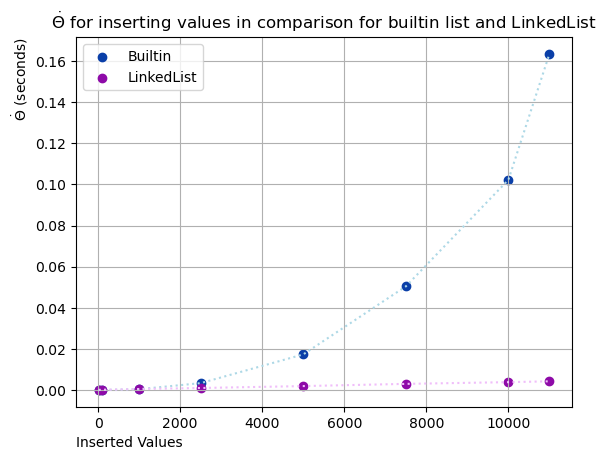

In [15]:
# Plot of the runtime for inserting values in differtent list-types
x = measurments_lists["01 input"]
y_builtin = measurments_lists["builtin"]
y_linked_list = measurments_lists["LinkedList"]

# Plot data
plt.scatter(x, y_builtin, label="Builtin", color="#0a3fa8")
plt.scatter(x, y_linked_list, label="LinkedList", marker="o", color="#8e0aa8")
plt.plot(x, y_builtin, linestyle=":", color="#ADD8E6")
plt.plot(x, y_linked_list, linestyle=":", color="#f0befa")

# Adding additional plot-elements and showing the plot
plt.legend()
plt.xlabel(xlabel="Inserted Values", loc="left")
plt.ylabel(ylabel="$\dot{\Theta}$ (seconds)", loc="top")
plt.grid()
plt.title(label="$\dot{\Theta}$ for inserting values in comparison for builtin list and LinkedList")
plt.show()




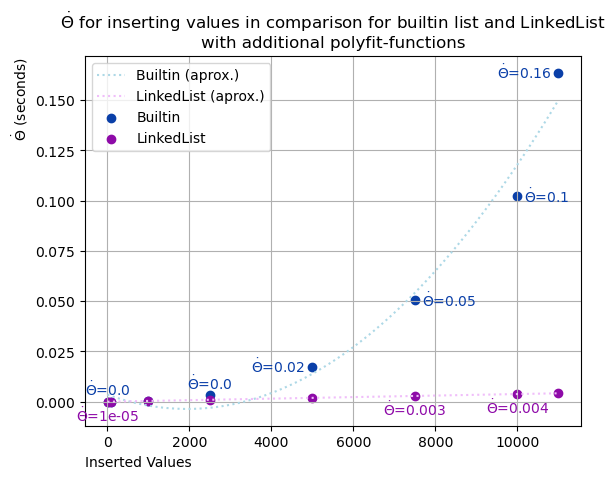

In [21]:
# Plot with additional polynomial curves

# Perform quadratic fit using polyfit
polynom_builtin = np.polyfit(x, y_builtin, 2)
polynom_linked_list = np.polyfit(x, y_linked_list, 2)

# Generate fitted data
x_fit = np.linspace(0, max(x), 100)
y_builtin_fit = np.polyval(polynom_builtin, x_fit)
y_linked_list_fit = np.polyval(polynom_linked_list, x_fit)

# Plot data and fitted curves
plt.plot(x_fit, y_builtin_fit, ':', color='#ADD8E6', label='Builtin (aprox.)')
plt.plot(x_fit, y_linked_list_fit, ':', color='#f0befa',label='LinkedList (aprox.)')
plt.scatter(x, y_builtin, color='#0a3fa8', label='Builtin')
plt.scatter(x, y_linked_list, color='#8e0aa8', label='LinkedList')

# Add annotations to relevant scatter-points
for i,text in enumerate(y_linked_list):
    if i == 6 or i == 5:
        plt.annotate("$\dot{\Theta}$=" + str(round(text,3)), (x[i], y_linked_list[i]), xytext=(0, -16), textcoords="offset points", ha='center', va='bottom', color='#8e0aa8')
    if i == 0:
        plt.annotate("$\dot{\Theta}$=" + str(round(text,5)), (x[i], y_linked_list[i]), xytext=(0, -16), textcoords="offset points", ha='center', va='bottom', color='#8e0aa8')

for i, text in enumerate(y_builtin):
    if i == 4 or i == 7:
        plt.annotate("$\dot{\Theta}$=" + str(round(text,2)), (x[i], y_builtin[i]), xytext=(-5, 1), textcoords="offset points", ha='right', va='center', color='#0a3fa8')
    elif i > 4:
        plt.annotate("$\dot{\Theta}$=" + str(round(text,2)), (x[i], y_builtin[i]), xytext=(5, 0), textcoords="offset points", ha='left', va='center', color='#0a3fa8')
    elif i == 0 or i == 3:
        plt.annotate("$\dot{\Theta}$=" + str(round(text,2)), (x[i], y_builtin[i]), xytext=(0, 9), textcoords="offset points", ha="center", va='center', color='#0a3fa8')

# Adding additional plot-elements and showing the plot
plt.legend()
plt.grid()
plt.xlabel(xlabel="Inserted Values", loc="left")
plt.ylabel(ylabel="$\dot{\Theta}$ (seconds)", loc="top")
plt.title(label="$\dot{\Theta}$ for inserting values in comparison for builtin list and LinkedList\nwith additional polyfit-functions")
plt.show()

